## <center> Indian Food
Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. 
We have the information about various Indian dishes, their ingredients, their place of origin, etc
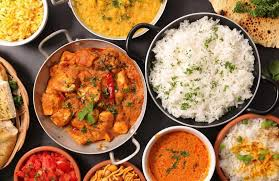

## Column Description

name : name of the dish

ingredients : main ingredients used

diet : type of diet - either vegetarian or non vegetarian

prep_time : preparation time

cook_time : cooking time

flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc

course : course of meal - starter, main course, dessert, etc

state : state where the dish is famous or is originated

region : region where the state belongs

Presence of -1 in any of the columns indicates NaN value.



In [1]:
#importing all the necessary libraries

#for mathematical operations
import numpy as np

#for data manipulation
import pandas as pd

#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset
data = pd.read_csv('indian_food.csv')

In [3]:
#Checking the head of the data
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
#Checking the tail of the data
data.tail()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central
254,Pinaca,"Brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West


In [40]:
#Checking the shape of the dataset
data.shape
print("There are {0} rows and {1} columns in the dataset".format(data.shape[0],data.shape[1]))

There are 225 rows and 9 columns in the dataset


In [6]:
#Replacing all the -1 values in the categorical and numerical columns with nan 
data= data.replace('-1',np.nan)
data = data.replace(-1,np.nan)

In [7]:
data['diet'].value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

In [8]:
data['course'].value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [9]:
data['flavor_profile'].value_counts()

spicy     133
sweet      88
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [10]:
data['state'].value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Bihar               3
Goa                 3
Madhya Pradesh      2
Jammu & Kashmir     2
Manipur             2
Nagaland            1
Haryana             1
Tripura             1
Chhattisgarh        1
Uttarakhand         1
NCT of Delhi        1
Name: state, dtype: int64

### First of all, we are going to take out some insights from the categorical variables.
So, first, lets check only the categorical variables of the dataset using select_dtypes function

In [11]:
#Checking the head of only categorical variables
data.select_dtypes('object').head()

,name,ingredients,diet,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,sweet,dessert,West Bengal,East


#### Now lets check the distribution of Veg vs Non Veg dishes with the help of pie chart and count plot.
We can observe that there are more number of veg dishes than the non-veg dishes.

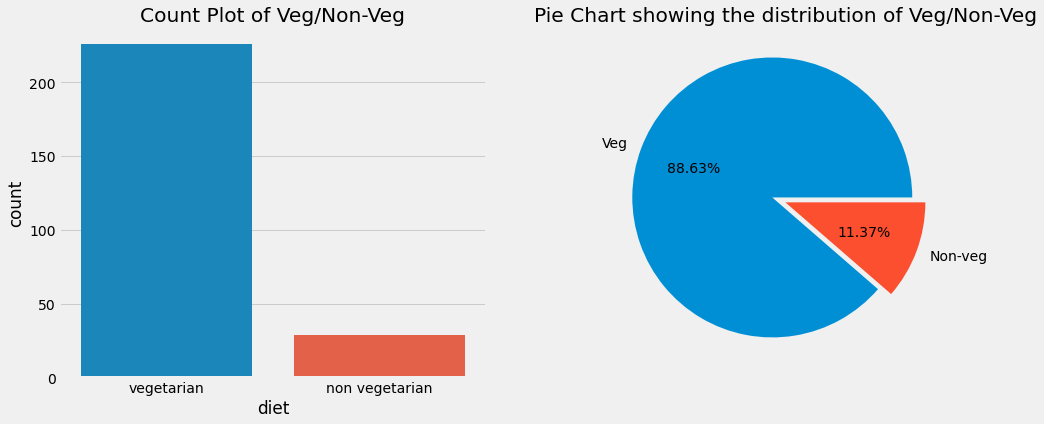

In [12]:
#Setting the style and background of plots
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('fivethirtyeight')

#Countplot of Veg/Non-Veg
plt.subplot(1,2,1)
sns.countplot(data['diet'])
plt.title("Count Plot of Veg/Non-Veg")

#Piechart for Veg/NonVeg
plt.subplot(1,2,2)
x = data['diet'].value_counts()
explode = [0.1,0]
labels = ['Veg','Non-veg']
plt.pie(x,explode=explode,labels=labels, autopct = '%.2f%%')
plt.title("Pie Chart showing the distribution of Veg/Non-Veg")
plt.show()

It can be infer that there are more Vegetarian dishes than Non-Vegetarian.
About 89% dishes are vegetarian and about 11% dishes are non vegetarian.

#### Now lets check for the count of different flavoured dishes.

Text(0.5, 1.0, 'Count Plot of flavours')

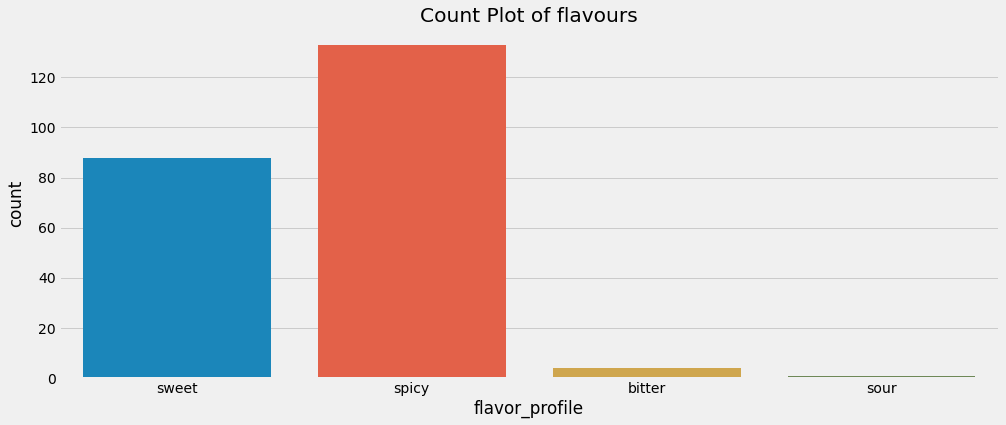

In [13]:
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('fivethirtyeight')

#Count plot of different flavours of dishes
sns.countplot(data['flavor_profile'])
plt.title("Count Plot of flavours")

1. Maximum dishes are spicy in flavour.
2. Bitter and sour flavour dishes are almost negligible in numbers comaprison to Spicy and Sweet flavour dishes.

#### Now, checking the count of different courses of meal like starter, main-course etc

Text(0.5, 1.0, 'Count Plot of course')

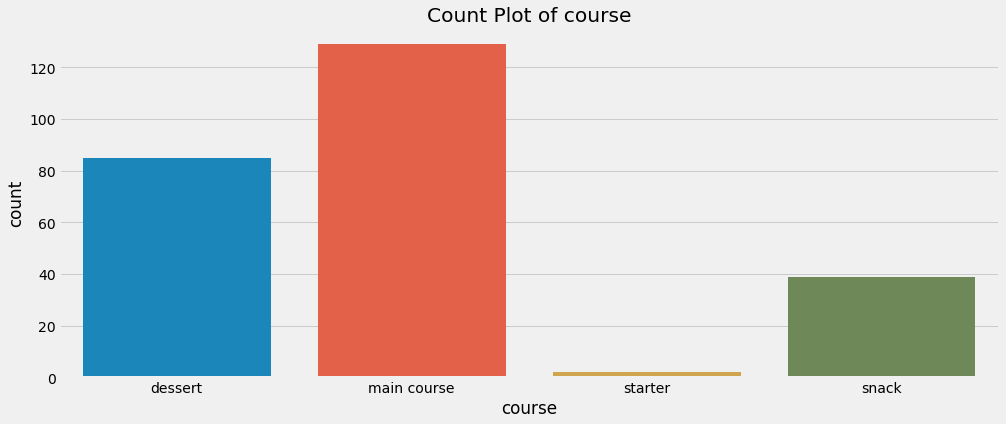

In [14]:
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('fivethirtyeight')

#Countplot of dish courses
sns.countplot(data['course'])
plt.title("Count Plot of course")

1. Maximum dishes are of main course.
2. Least dishes are for starter.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

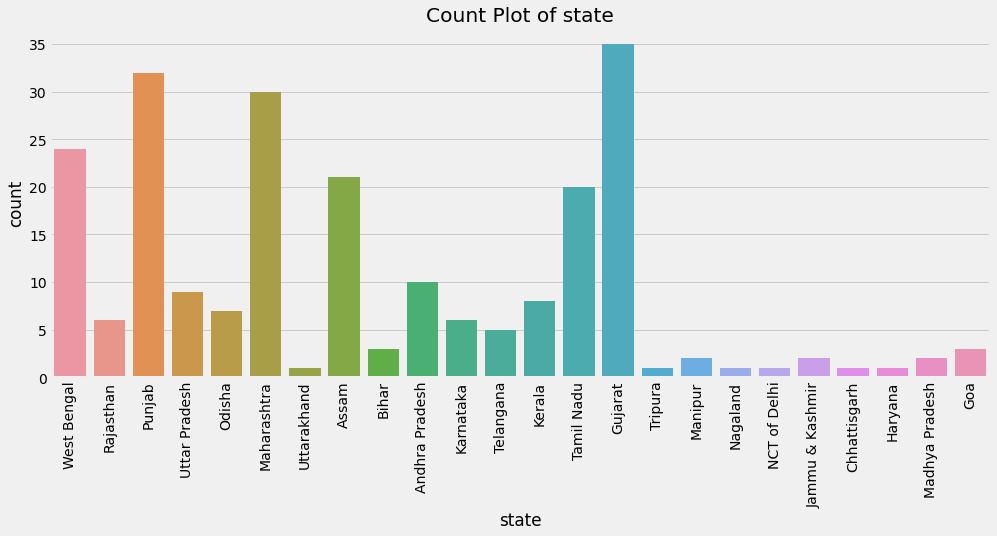

In [15]:
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('fivethirtyeight')

#Countplot of states
sns.countplot(data['state'])
plt.title("Count Plot of state")
plt.xticks(rotation=90)

Maximum number of dishes are from Gujarat, Punjab and Maharashtra.

## Top 6 states with maximum number of dishes.

In [16]:
a = data['state'].value_counts().reset_index()
a.sort_values(by='state',ascending=False).head(6).style.background_gradient(cmap='copper')

,index,state
0,Gujarat,35
1,Punjab,32
2,Maharashtra,30
3,West Bengal,24
4,Assam,21
5,Tamil Nadu,20


Text(0.5, 1.0, 'Count Plot of region')

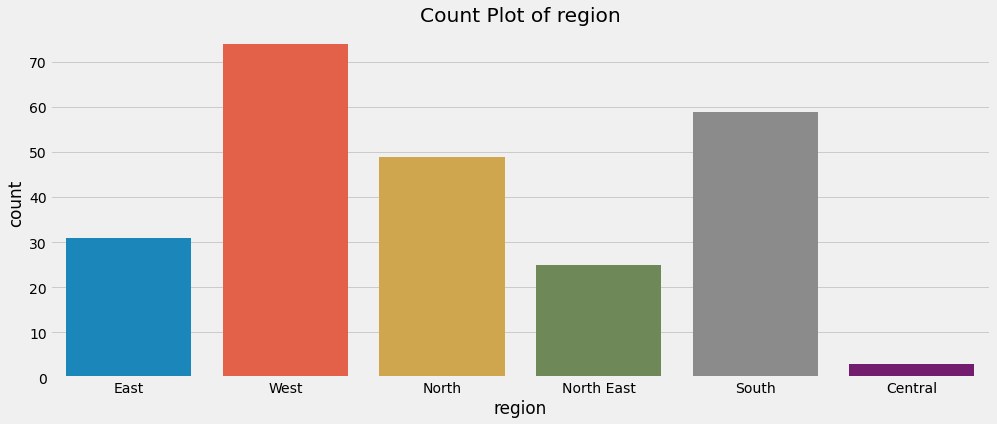

In [17]:
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('fivethirtyeight')

#Countplot of region
sns.countplot(data['region'])
plt.title("Count Plot of region")

West Region has maximum number of dishes.

In [18]:
data.select_dtypes('number').head()

,prep_time,cook_time
0,45.0,25.0
1,80.0,30.0
2,15.0,60.0
3,15.0,30.0
4,15.0,40.0


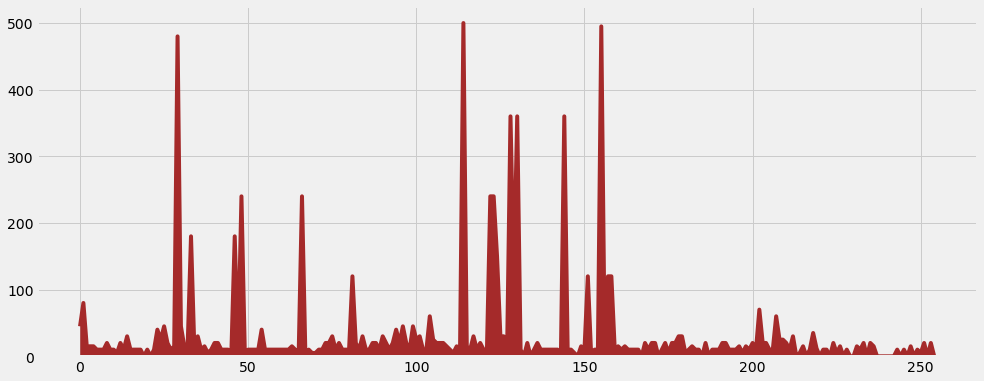

In [19]:
data['prep_time'].plot(kind='area',color='brown')

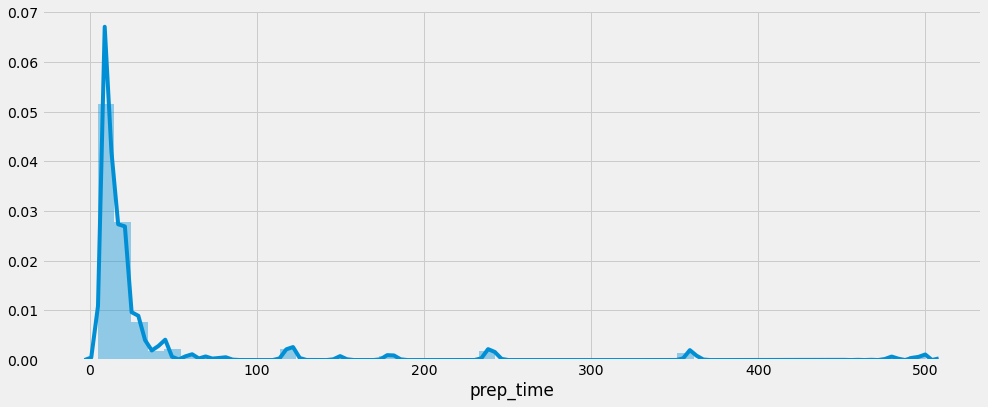

In [20]:
sns.distplot(data['prep_time'])

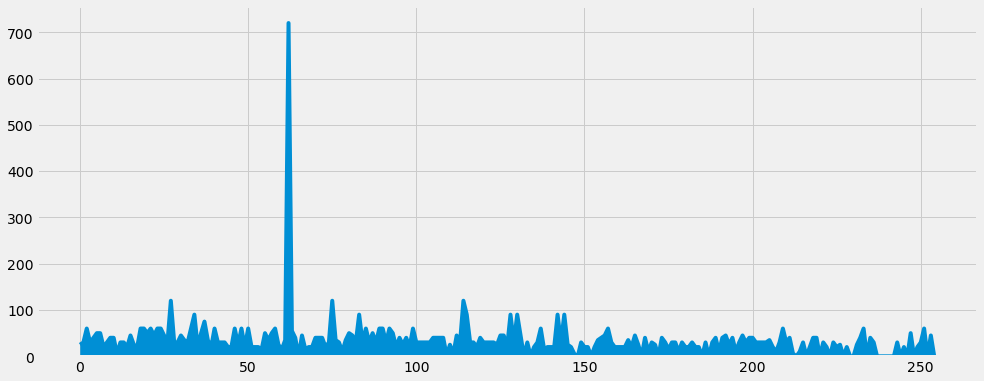

In [21]:
data['cook_time'].plot(kind='area')

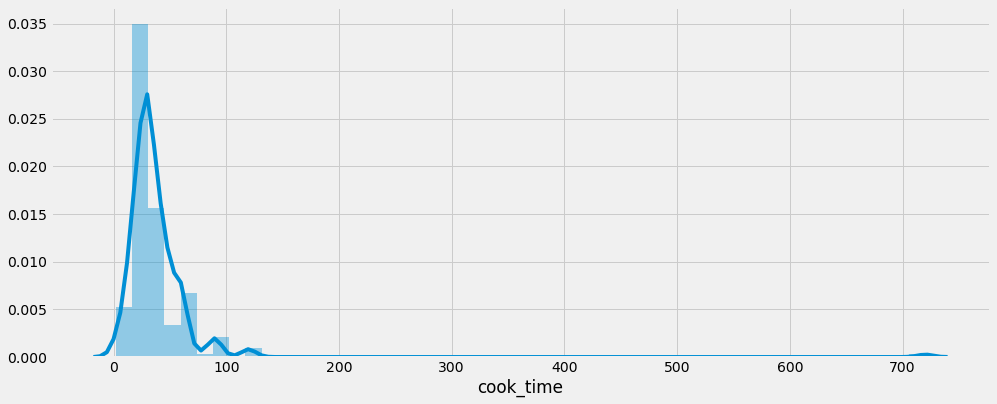

In [22]:
sns.distplot(data['cook_time'])

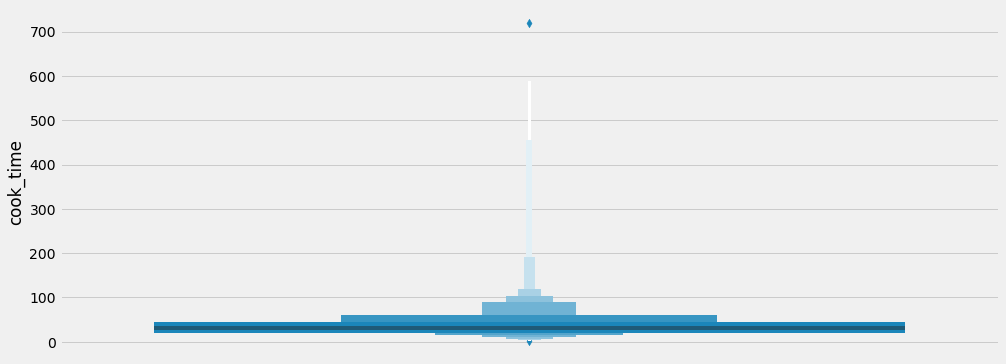

In [23]:
sns.boxenplot(data['cook_time'], orient = 'v')

## Bivariate Analysis

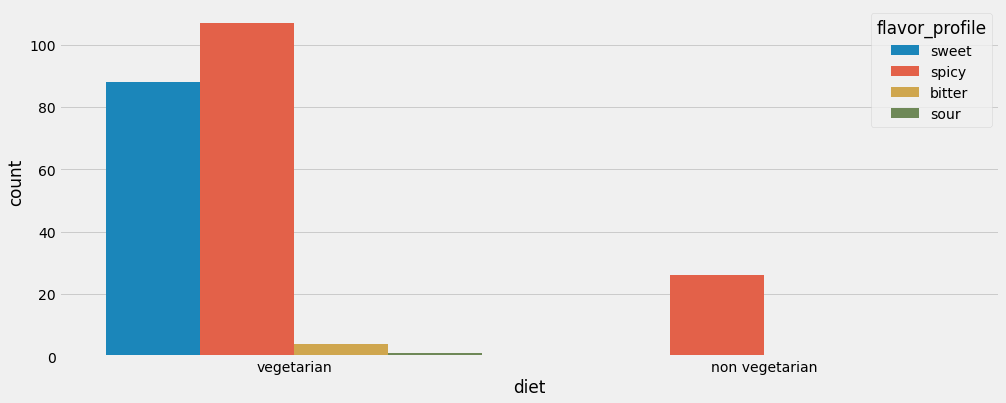

In [24]:
sns.countplot(data['diet'],hue=data['flavor_profile'])

1. Non Vegetarian dishes are spicy in flavour.
2. Vegetarian dishes are available in all flavours.

In [103]:
#Crosstab of flavour and course of the dishes
x = pd.crosstab(data['flavor_profile'],data['course']).style.background_gradient(cmap='copper')
x

course,dessert,main course,snack,starter
flavor_profile,,,,
bitter,0,3,1,0
sour,0,1,0,0
spicy,0,81,33,2
sweet,77,3,0,0


We can infer the following:-
1. There are three dishes which are sweet but not come under dessert course.
2. There is only 1 sour flavored dish which comes in main course.
3. We have only two starter dishes.
4. Dishes in main course comes in all the four flavors i.e., bitter, sour, spicy and sweet.

In [105]:
y = pd.crosstab(data['course'],data['diet'])
y.style.bar(color=['gold'])

diet,non vegetarian,vegetarian
course,,
dessert,0,77
main course,17,93
snack,0,36
starter,2,0


1. Thw only two starter dishes which we have are non-veg.
2. All the snacks and dessert dishes are veg.
3. Main course has both veg and non veg dishes.

In [30]:
data[['course','prep_time']].sort_values(by='prep_time',ascending=False).reset_index().head()

,index,course,prep_time
0,114,main course,500.0
1,155,main course,495.0
2,29,dessert,480.0
3,130,snack,360.0
4,128,snack,360.0


prep_time                 
                     max       mean   min
flavor_profile                           
bitter              20.0  15.000000  10.0
sour                10.0  10.000000  10.0
spicy              500.0  37.327586   5.0
sweet              480.0  31.337500   5.0

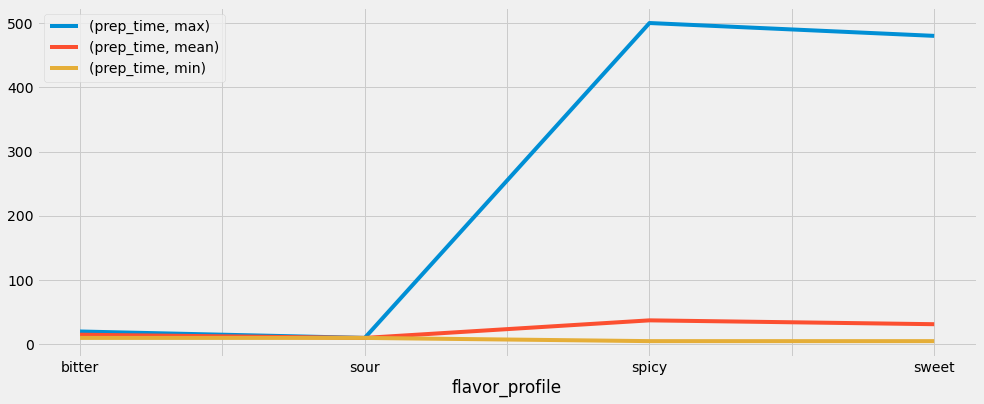

In [110]:
display(data[['flavor_profile','prep_time']].groupby(['flavor_profile']).agg(['max','mean','min']))

#Plotting the same
x= data[['flavor_profile','prep_time']].groupby(['flavor_profile']).agg(['max','mean','min'])
x.plot(kind='line')
plt.legend()
plt.show()

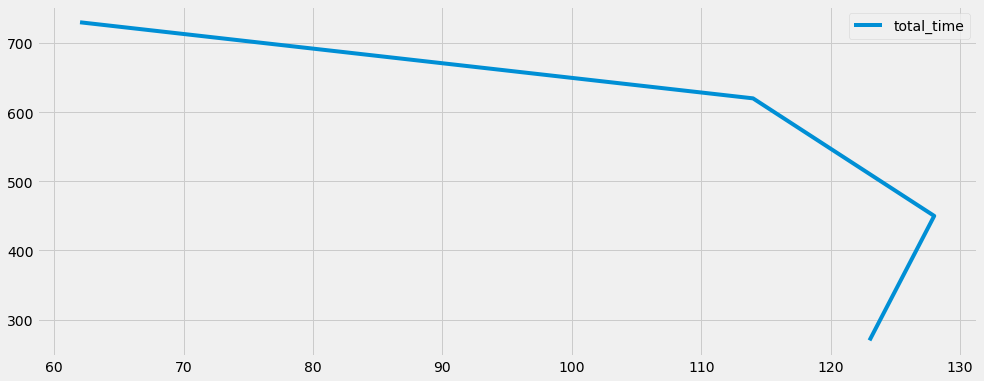

In [58]:
#Total time taken to serve a dish can be calculated by adding the cook time and prep time.
data['total_time'] = data['prep_time']+data['cook_time']

x = data.loc[data.groupby(['course'])['total_time'].idxmax()][['total_time','course']]
x

total_time       
                   max    min
course                       
dessert          730.0   10.0
main course      620.0   20.0
snack            450.0   10.0
starter          270.0  165.0

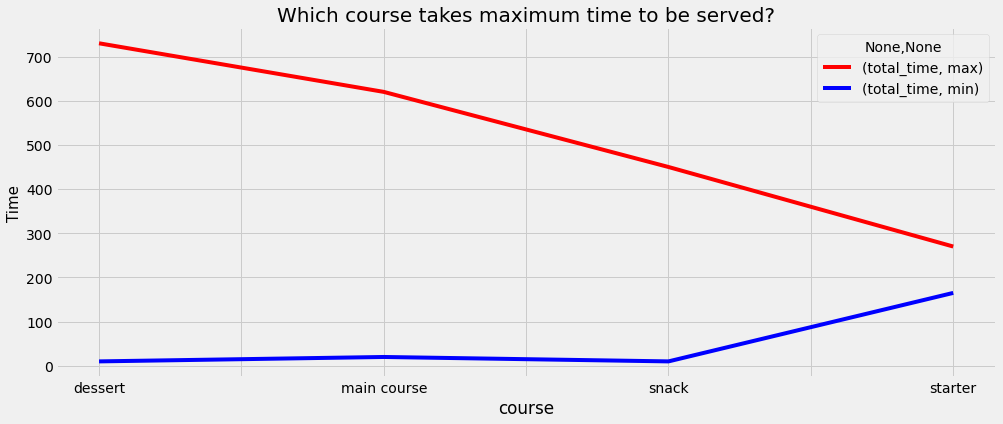

In [68]:
display(data[['total_time','course']].groupby(['course']).agg(['max','min']))

#Lets plot this
data[['total_time','course']].groupby(['course']).agg(['max','min']).plot(kind='line', color=['red','blue'])
plt.title("Which course takes maximum time to be served?", fontsize=20)
plt.ylabel("Time",fontsize=15)
plt.show()

In [75]:
pd.crosstab(data['region'], data['diet']).style.bar(color='gold')

diet,non vegetarian,vegetarian
region,,
Central,0,3
East,4,23
North,5,43
North East,6,7
South,3,52
West,1,65


In [81]:
pd.crosstab(data['state'], data['diet']).style.bar(color='gold')

diet,non vegetarian,vegetarian
state,,
Andhra Pradesh,0,10
Assam,5,6
Bihar,0,3
Chhattisgarh,0,1
Goa,1,1
Gujarat,0,31
Haryana,0,1
Jammu & Kashmir,0,1
Karnataka,0,6


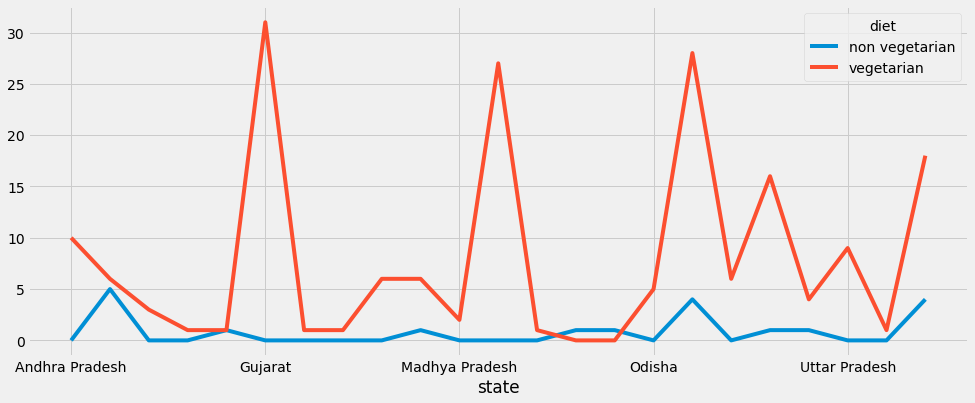

In [82]:
pd.crosstab(data['state'], data['diet']).plot()

### State with its dishes

In [92]:
#Defining a function which displays all the dishes names for a particular state
def state_dish(x):
    return data[data['state']==x][['name','diet','flavor_profile']]

In [93]:
state_dish('Gujarat')

,name,diet,flavor_profile
56,Basundi,vegetarian,sweet
58,Doodhpak,vegetarian,sweet
168,Saath,vegetarian,spicy
169,Bajri no rotlo,vegetarian,spicy
174,Chevdo,vegetarian,spicy
175,Chorafali,vegetarian,spicy
176,Copra paak,vegetarian,NaN
177,Daal Dhokli,vegetarian,spicy
178,Kutchi dabeli,vegetarian,spicy
181,Dhokla,vegetarian,spicy


In [95]:
state_dish('Maharashtra')

,name,diet,flavor_profile
16,Sheera,vegetarian,sweet
39,Chikki,vegetarian,sweet
55,Anarsa,vegetarian,sweet
57,Dhondas,vegetarian,sweet
59,Mahim halwa,vegetarian,sweet
60,Modak,vegetarian,sweet
61,Shankarpali,vegetarian,sweet
62,Shrikhand,vegetarian,sweet
63,Sutar feni,vegetarian,sweet
78,Chapati,vegetarian,NaN


## Regions with its dishes

In [99]:
#Defining a function which displays all the dishes of a particular region
def region_dish(x):
    return data[data['region']==x][['name','diet','flavor_profile','state']]

In [100]:
region_dish('Central')

,name,diet,flavor_profile,state
89,Fara,vegetarian,spicy,Chhattisgarh
194,Laapsi,vegetarian,spicy,Madhya Pradesh
253,Mawa Bati,vegetarian,sweet,Madhya Pradesh
